# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
df = pd.read_csv('data/human_body_temperature.csv')

In [7]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Question 1. Is the distribution of body temperatures normal?
<ul>
<li> According to the PDF and CDF of body temperature, it approximately follows normal distribution.
</ul>

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

Mean of temperature is:  98.24923076923078
Standard deviation of temperature is:  0.7303577789050377


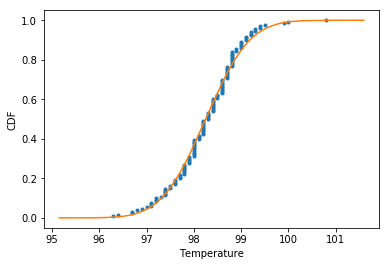

In [9]:
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
samples = np.random.normal(mean,std,100000)
x_theor, y_theor = ecdf(samples)
x, y = ecdf(df['temperature'])
print('Mean of temperature is: ', mean)
print('Standard deviation of temperature is: ', std)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')

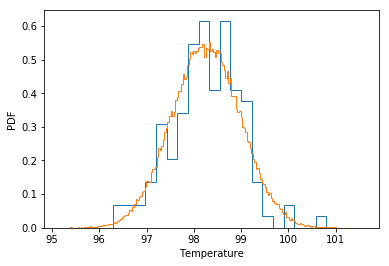

In [10]:
samples_pdf = np.random.normal(mean,std,100000)
_ = plt.hist(df['temperature'],bins=20,histtype='step',normed=True)
_ = plt.hist(samples,bins=200,histtype='step',normed=True)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('PDF')

### Question 2.
<ul>
<li> Is the sample size large? 
     <ul>
     <li> Since the sample roughly follows normal distribution, it's large enough for z-test. And the size is 130.
     </ul>
<li> Are the observations independent?
     <ul>
     <li> Since the sample roughly follows normal distribution, we can say the observations are independent because this is the assumption of normality.
     <li> According to the pearson_r and correlation hypothesis tests, the features are also independent.
     </ul>
</ul>

In [11]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

In [12]:
print('Sample size is: ',len(df))

Sample size is:  130


In [40]:
r_obs_th = pearson_r(df['temperature'], df['heart_rate'])
print('Pearson r of temperature and heart rate:', r_obs_th)
perm_replicates_th = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    temperature_permuted = np.random.permutation(df['temperature'])
    # Compute Pearson correlation
    perm_replicates_th[i] = pearson_r(temperature_permuted, df['heart_rate'])
# Compute p-value: p
p_th = np.sum(perm_replicates_th >= r_obs_th)/len(perm_replicates_th)
print('p-val =', p_th)

Pearson r of temperature and heart rate: 0.253656402721
p-val = 0.0017


In [41]:
gender = df['gender']=='F'
r_obs_tg = pearson_r(df['temperature'],gender)
print('Pearson r of gender and heart rate:',r_obs_tg)
perm_replicates_tg = np.empty(10000)
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    temperature_permuted = np.random.permutation(df['temperature'])
    # Compute Pearson correlation
    perm_replicates_tg[i] = pearson_r(temperature_permuted, gender)
# Compute p-value: p
p_tg = np.sum(perm_replicates_tg >= r_obs_tg)/len(perm_replicates_tg)
print('p-val =', p_tg)

Pearson r of gender and heart rate: 0.198006222145
p-val = 0.0129


In [42]:
r_obs_hg = pearson_r(df['heart_rate'],gender)
print('Pearson r of temperature and gender:',r_obs_hg)
perm_replicates_hg = np.empty(10000)
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    heart_rate_permuted = np.random.permutation(df['heart_rate'])
    # Compute Pearson correlation
    perm_replicates_tg[i] = pearson_r(heart_rate_permuted, gender)
# Compute p-value: p
p_hg = np.sum(perm_replicates_hg >= r_obs_th)/len(perm_replicates_hg)
print('p-val =', p_hg)

Pearson r of temperature and gender: 0.0557662206054
p-val = 0.002


According to the correlation hypothesis tests above, we can draw the conclusion that columns in this dataset are independent.

### Question 3. Is the true population mean really 98.6 degrees F?
<ul>
<li> Would you use a one-sample or two-sample test? Why?
    <ul>
    <li> In this case, I'll use one-sample test, because it compares a data set to a single number.
    </ul>
<li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <ul>
    <li> Both are Okay, because the sample approximately follows normal distribution. And since the size of sample is relatively large, so it's appropriate to use $z$ statistic.
    </ul>
<li> Now try using the other test. How is the result be different? Why?
    <ul>
    <li> P value of $t$ test is a little bit larger than $z$ test in this case. Because the size of sample influences the standard error of mean.
    </ul>
</ul>

In [22]:
def bootstrap_replicate_1d(data,func):
    bs_sample = np.random.choice(data,len(data))
    return func(bs_sample)

In [23]:
def draw_bs_reps(data,func,size=1):
    bs = np.empty(size)
    for i in range(size):
        bs[i] = bootstrap_replicate_1d(data,func)
    return bs

SEM is:  0.0640566146952
Standard deviation is:  0.0642379381524


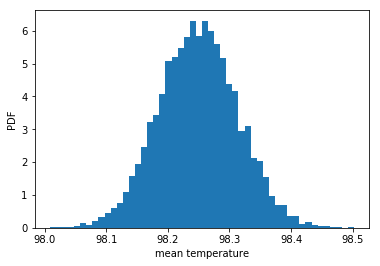

In [54]:
bs_replicates_3 = draw_bs_reps(df['temperature'],np.mean,size=10000)

# Compute and print SEM
sem = np.std(df['temperature']) / np.sqrt(len(df['temperature']))
print('SEM is: ', sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates_3)
print('Standard deviation is: ', bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates_3, bins=50, normed=True)
_ = plt.xlabel('mean temperature')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

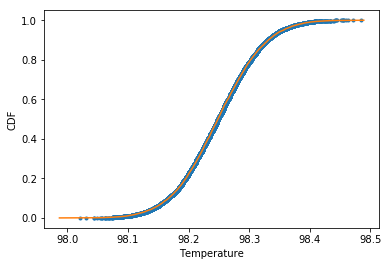

In [25]:
mean_bs_3 = np.mean(bs_replicates_3)
std_bs_3 = np.std(bs_replicates_3)
samples_3 = np.random.normal(mean_bs_3,std_bs_3,10000)
x_theor_3, y_theor_3 = ecdf(samples_3)
x, y = ecdf(bs_replicates_3)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor_3, y_theor_3)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')

In this situation, it is appropriate to use the t or z statistic, because the value of mean is approximately a normal distribution.

In [51]:
z_score = (98.6 - np.mean(df['temperature']))/sem
print('z score:', z_score)

z score: 5.47592520208


In [52]:
from scipy import stats
p = (1-stats.norm.cdf(z_score))*2
print('p value:',p)

p value: 4.35231517493e-08


According to the two side p value, 98.6 F is significantly higher than the mean of random sample.

In [49]:
t_score = (98.6 - np.mean(df['temperature']))/((np.std(df['temperature'], ddof = 1))/np.sqrt(len(df['temperature'])))
print('t score:', t_score)

t score: 5.45482329236


In [50]:
p = stats.t.sf(np.abs(t_score), len(df['temperature'])-1)*2
print('p value:',p)

p value: 2.41063204156e-07


According to the t_score, z_score and p value, 98.6 F is significantly higher than the mean of random sample.

### Question 4. Draw a small sample of size 10 from the data and repeat both tests. 
<ul>
<li> Which one is the correct one to use? 
    <ul>
    <li> $t$ test is the correct one, because the size is too small.
    </ul>
<li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    <ul>
    <li> Both t and z test are Okay, but the t test is better in this case, because it doesn't require a standard deviation, and generate a larger p value. When the sample size is small, it's difficult to know if it follows a Gausan normal distribution, so t test is a better choice.
    </ul>
</ul>

In [30]:
small_sample = np.random.choice(df['temperature'],size=10)
print(small_sample)

[ 97.4  98.6  98.6  98.6  98.8  98.7  98.2  98.7  98.7  99. ]


In [56]:
mean_small = np.mean(small_sample)
sem_small = np.std(small_sample) / np.sqrt(len(small_sample))
z_score_small = (98.6 - np.mean(small_sample))/sem_small
from scipy import stats
p = (1-stats.norm.cdf(z_score_small))*2
print('mean of samll sample is:',mean_small)
#print('SEM of small sample is: ',sem_small)
print('z_score of small sample is: ',z_score_small)
print('p value is: ',p)

mean of samll sample is: 98.53
z_score of small sample is:  0.52452486454
p value is:  0.599913530393


In [32]:
t_score = (98.6 - np.mean(small_sample))/((np.std(small_sample, ddof = 1))/np.sqrt(len(small_sample)))
print('T score of small sample is: ',t_score)
p = stats.t.sf(np.abs(t_score), len(df['temperature'])-1)*2
print('P value is: ',p)

T score of small sample is:  0.497607978401
P value is:  0.619607540157


According to the p value we get from z test and t test, it is not significantly small, so the null hypothesis is acceptable, and we can think of 98.6 degree F as mean of this small sample. 

### Question 5. At what temperature should we consider someone's temperature to be "abnormal"?
<ul>
<li> Start by computing the margin of error and confidence interval.
    <ul>
    <li> I would like to consider temperature out of the range [98.12, 98.38] as 'abnormal'.
    </ul>
</ul>

95% confidence interval = [ 98.12384615  98.37615385]
Margin of error = 0.125550964803


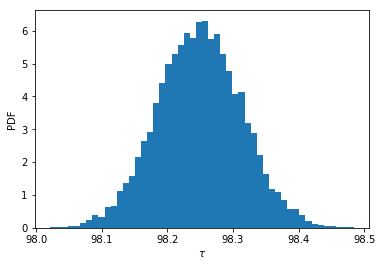

In [33]:
# Compute the 95% confidence interval: conf_int
margin_of_error = 1.96 * np.std(df['temperature']) / np.sqrt(len(df['temperature'])) 
conf_int = np.percentile(bs_replicates_3,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int)
print('Margin of error =', margin_of_error)
# Plot the histogram of the replicates
_ = plt.hist(bs_replicates_3, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### Question 6. Is there a significant difference between males and females in normal temperature?
<ul>
<li> Since the p value is significantly small, there's no significant difference between males and females in normal temperature.

<li> What test did you use and why?
    <ul>
    <li> Draw permutation replicates to test the difference of mean hypothesis, because the difference of mean of the samples may be generated by chance.
    </ul>
<li> Write a story with your conclusion in the context of the original problem.
    <ul>
    <li> It's difficult to say what is the true normal human being temperature, and I can only assume hypothesis and then draw conclusion according to this sample.
         Body temperature is independent to gender and heart rate, and the mean of body temperature is 98.25 degree F, and 95% confidence interval is [98.12, 98.38]. So we can consider the body temperature out of the confidence interval as abnormal.
         Finally, there's no significant difference between males and females in normal temperature.
    </ul>
</ul>

In [34]:
def diff_of_mean(x, y):
    return (np.mean(x) - np.mean(y))

In [35]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [36]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [37]:
temperature_female = df[df['gender']=='F']['temperature']
temperature_male = df[df['gender']=='M']['temperature']

In [38]:
diff_mean_gender = diff_of_mean(temperature_female,temperature_male)
print('Difference of mean of female and male\'s temperature is: ', diff_mean_gender)

Difference of mean of female and male's temperature is:  0.289230769230727


In [39]:
temp_female_shifted = temperature_female - np.mean(temperature_female) + np.mean(df['temperature'])
temp_male_shifted = temperature_female - np.mean(temperature_female) + np.mean(df['temperature'])
perm_replicates_gender = draw_perm_reps(temp_female_shifted,temp_male_shifted,diff_of_mean,size=10000)
p = np.sum(perm_replicates_gender > diff_mean_gender)/len(perm_replicates_gender)
print('P value is: ',p)

P value is:  0.0124
